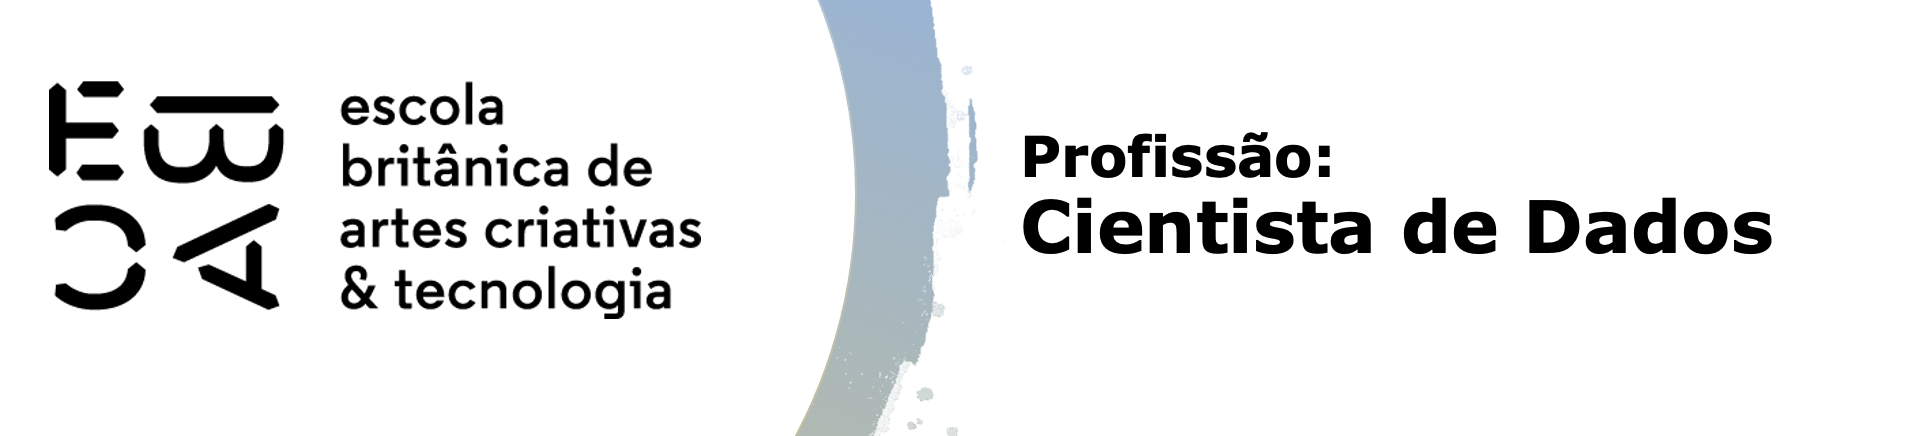

### 1. Carregando as bases


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV

#### Carregando os dados

In [2]:
# Carregando o arquivo usando o pandas com espaço em branco como separador
features = pd.read_csv("./UCI HAR Dataset/features.txt", sep='\s+', header=None)
# Carregando o arquivo usando o pandas com espaço em branco como separador
subject_train = pd.read_csv("./UCI HAR Dataset/train/subject_train.txt", sep='\s+', header=None)
# Carregando o arquivo usando o pandas com espaço em branco como separador
X_train = pd.read_csv("./UCI HAR Dataset/train/X_train.txt", sep='\s+', header=None)
# Definindo os nomes das colunas em X_train com base em features.txt
X_train.columns = features[1]
# Adicionando a coluna do subject_train como uma variável em X_train
X_train['Subject'] = subject_train[0]
# Criando um índice duplo composto pela ordem dos dados e pelo identificador do indivíduo
X_train = X_train.reset_index().set_index(['index', 'Subject'])
# Carregando o arquivo usando o pandas com espaço em branco como separador
subject_test = pd.read_csv("./UCI HAR Dataset/test/subject_test.txt", sep='\s+', header=None)
# Carregando o arquivo usando o pandas com espaço em branco como separador
X_test = pd.read_csv("./UCI HAR Dataset/test/X_test.txt", sep='\s+', header=None)
# Definindo os nomes das colunas em X_train com base em features.txt
X_test.columns = features[1]
# Adicionando a coluna do subject_test como uma variável em X_test
X_test['Subject'] = subject_test[0]
# Criando um índice duplo composto pela ordem dos dados e pelo identificador do indivíduo
X_test = X_test.reset_index().set_index(['index', 'Subject'])
# Carregando y_train e y_test
y_test = pd.read_csv("./UCI HAR Dataset/test/y_test.txt", sep='\s+', header=None)
y_train = pd.read_csv("./UCI HAR Dataset/train/y_train.txt", sep='\s+', header=None)


### 2. Calcule os ```ccp_alphas```. 

Vamos seguir uma lógica bem em linha com o que já estamso acostumados, com as seguintes orientações:

- Utilizar treinamento e teste conforme já vieram definidos originalmente
- Por pragmatismo, utilizar ```min_samples_leaf=20```
- Utilize as mesmas "3 melhores variáveis" identificadas no exercício anterior.

In [12]:
%%time

# Criando o modelo
clf = DecisionTreeClassifier(max_depth=4, random_state=42, min_samples_leaf=20)
# Calculando os ccp_alphas
caminho = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = caminho.ccp_alphas, caminho.impurities

CPU times: total: 1.88 s
Wall time: 4.01 s


In [14]:
# Garantindo a uniprevalência de cada ccp_alpha
ccp_alpha = np.unique(ccp_alphas[ccp_alphas>=0])

### 3. *Grid Search*

Vou deixar especificações iniciais mínimas, que visam limitar o tempo de máquina, pois um procedimento desses pode demorar muito tempo dependendo da especificação. Mas conforme você for ficando confortável com o tempo consumido pelo procedimento, pode fazer um algoritmo mais exaustivo, por exemplo, avaliando mais valores de ```ccp_alpha```.

- Meça o tempo
- Utilize a base de treinamento
- Utilize um *cross validation* do tipo *k-fold*, especifique k=10
- Você pode ler 1 a cada ```k``` valores para uma melhor varredura utilizando, por exemplo, ```ccp_alpha[::10]```
- Não se esqueça de limitar o número de variáveis

In [21]:
%%time

# Rodando a árvore
clf = DecisionTreeClassifier(max_depth=4, random_state=42, min_samples_leaf=20)
# Definindo o grid de parametros
grid_parametros = {'ccp_alpha':ccp_alphas}
# Procurando o melhor Grid
grid = GridSearchCV(estimator=clf, param_grid=grid_parametros, cv=2, verbose=100)
grid.fit(X_train, y_train)

Fitting 2 folds for each of 9 candidates, totalling 18 fits
[CV 1/2; 1/9] START ccp_alpha=0.0...............................................


[CV 1/2; 1/9] END ................ccp_alpha=0.0;, score=0.822 total time=   4.8s
[CV 2/2; 1/9] START ccp_alpha=0.0...............................................
[CV 2/2; 1/9] END ................ccp_alpha=0.0;, score=0.858 total time=   4.3s
[CV 1/2; 2/9] START ccp_alpha=0.003440509138242197..............................
[CV 1/2; 2/9] END ccp_alpha=0.003440509138242197;, score=0.822 total time=   7.3s
[CV 2/2; 2/9] START ccp_alpha=0.003440509138242197..............................
[CV 2/2; 2/9] END ccp_alpha=0.003440509138242197;, score=0.858 total time=   7.0s
[CV 1/2; 3/9] START ccp_alpha=0.007428722297431772..............................
[CV 1/2; 3/9] END ccp_alpha=0.007428722297431772;, score=0.822 total time=   3.5s
[CV 2/2; 3/9] START ccp_alpha=0.007428722297431772..............................
[CV 2/2; 3/9] END ccp_alpha=0.007428722297431772;, score=0.858 total time=   3.9s
[CV 1/2; 4/9] START ccp_alpha=0.011786934153282457..............................
[CV 1/2; 4/9] END ccp_al

GridSearchCV(cv=2,
             estimator=DecisionTreeClassifier(max_depth=4, min_samples_leaf=20,
                                              random_state=42),
             param_grid={'ccp_alpha': array([0.        , 0.00344051, 0.00742872, 0.01178693, 0.07989644,
       0.09085682, 0.10936372, 0.16725772, 0.18613824])},
             verbose=100)

In [22]:
# Vendo os resultados em um dataframe para melhor visualização
resultados = pd.DataFrame(grid.cv_results_)
resultados.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_ccp_alpha,params,split0_test_score,split1_test_score,mean_test_score,std_test_score,rank_test_score
0,4.665165,0.244875,0.022287,0.000182,0.0,{'ccp_alpha': 0.0},0.821817,0.857998,0.839908,0.018090,2
1,7.165006,0.240474,0.078779,0.056589,0.003441,{'ccp_alpha': 0.003440509138242197},0.821817,0.857998,0.839908,0.018090,2
2,3.750158,0.201416,0.042467,0.017524,0.007429,{'ccp_alpha': 0.007428722297431772},0.821817,0.857998,0.839908,0.018090,2
3,3.169059,0.539364,0.165501,0.134374,0.011787,{'ccp_alpha': 0.011786934153282457},0.821817,0.868063,0.844940,0.023123,1
4,5.117738,0.398283,0.046906,0.002860,0.079896,{'ccp_alpha': 0.07989643514752323},0.823993,0.782372,0.803183,0.020811,5


### 4. Avaliando a árvore

- Obtenha a árvore na melhor configuração treinada em toda a base de treino
- Calcule a acurácia dessa árvore na base de testes
- Visualize a matriz de confusão

In [26]:
# Obtendo a árvore na melhor configuração treinada na base de treino

melhor_ccp = resultados.iloc[grid.best_index_, 4]

clf = DecisionTreeClassifier(random_state=42, ccp_alpha = melhor_ccp).fit(X_train, y_train)

In [29]:
# Verificando acurácia dessa árvore na base de teste
acuracia_test = clf.score(X_train, y_train)

print(f"Acurácia: {acuracia_test*100:.2f}")

Acurácia: 89.57


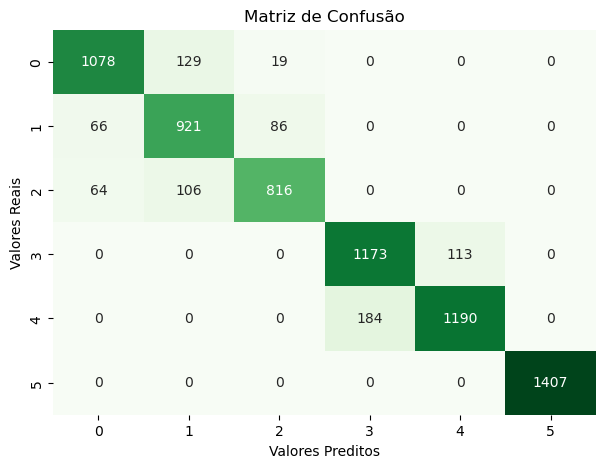

In [33]:
# Fazendo previsões no conjunto com a base de treino
y_pred = clf.predict(X_train)

# Calculando a matriz de confusão
cm = confusion_matrix(y_train, y_pred)

# Plotando a matriz de confusão como um heatmap
plt.figure(figsize=(7, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Greens", cbar=False)
plt.xlabel('Valores Preditos')
plt.ylabel('Valores Reais')
plt.title('Matriz de Confusão')
plt.show()

### 5. Melhorando a árvore

A melhor forma de se melhorar um algoritmo é colocando nele novas variáveis que agreguem valor. Podemos usar a força-bruta e ir colocando variáveis aleatoriamente - ou colocar todas e deixar rodando por um bom tempo - ou utilizar uma lógica eficiente e fazer uma seleção de variáveis.

- Observe que há classes mais fáceis e mais difíceis de se identificar
- Crie uma variável binária para uma das classes de maior erro
- Fala uma árvore de classificação bem simples para esta variável:
    - utilize ```mean_samples_leaf=20```
    - utilize ```max_depth=4```
    - coloque todas as variáveis
- Observe a importância das variáveis, e selecione as 3 com maior importância
- Rode novamente o algoritmo acima com as 3 novas variáveis e avalie a acurácia

In [34]:
# Obtendo a importância das variáveis
importances = clf.feature_importances_

# Criando um dicionário que mapeia nomes de colunas (variáveis) para suas importâncias
feature_importance_dict = {feature_name: importance for feature_name, importance in zip(X_train.columns, importances)}

# Ordenando o dicionário pelas importâncias em ordem decrescente
sorted_feature_importance = sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True)

# Obtendo as 3 variáveis mais importantes
top_3_variables = sorted_feature_importance[:3]

# Imprimindo as 3 variáveis mais importantes e suas importâncias
for variable, importance in top_3_variables:
    print(f"Variável: {variable}, Importância: {importance}")

Variável: tGravityAcc-min()-X, Importância: 0.28532491888609846
Variável: angle(Y,gravityMean), Importância: 0.16763988727884296
Variável: fBodyAccMag-energy(), Importância: 0.13927130621719028


In [35]:
# Usando apenas as 3 melhores variáveis encontradas
variables = ['tGravityAcc-min()-X', 'angle(Y,gravityMean)', 'fBodyAccMag-energy()']
X_train_subset = X_train[variables]

# Criando uma árvore com a variável X_train_subset que contém as 3 variáveis consideradas mais importantes
# Definindo o ccp_alpha como o melhor ccp_alpha encontrado
clf = DecisionTreeClassifier(max_depth=4, ccp_alpha = melhor_ccp, random_state=42, min_samples_leaf=20)
clf.fit(X_train_subset, y_train)

DecisionTreeClassifier(ccp_alpha=0.011786934153282457, max_depth=4,
                       min_samples_leaf=20, random_state=42)

Acurácia: 85.04


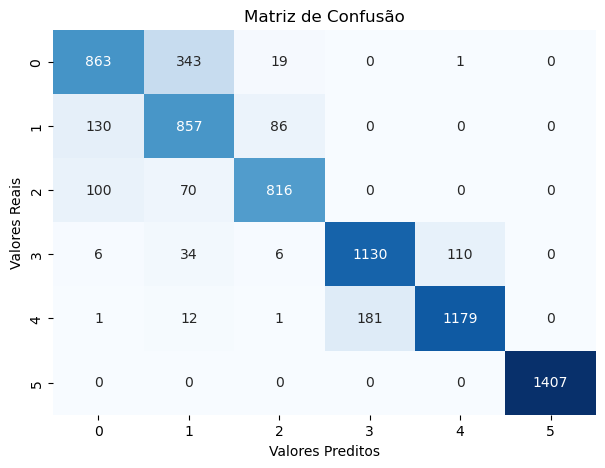

In [39]:
# Verificando acurácia dessa árvore na base de teste
acuracia_test = clf.score(X_train_subset, y_train)

print(f"Acurácia: {acuracia_test*100:.2f}")

# Fazendo previsões no conjunto com a base de treino
y_pred = clf.predict(X_train_subset)

# Calculando a matriz de confusão
cm = confusion_matrix(y_train, y_pred)

# Plotando a matriz de confusão como um heatmap
plt.figure(figsize=(7, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel('Valores Preditos')
plt.ylabel('Valores Reais')
plt.title('Matriz de Confusão')
plt.show()